<a href="https://colab.research.google.com/github/vishnudas08/Digit-Recognition-using-CNN/blob/main/MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import  torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [43]:
transform=transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,)), # -1,0,+1


]

)
# Download training data from open datasets.
train_data=datasets.MNIST(
    root='data.mnist',
    download=True,
    train= True,
   transform=transform
)
# Download test data from open datasets.
test_data= datasets.MNIST(
    root='data.mnist',
    download=True,
    train=False,
    transform=transform

)

In [44]:
print(f"{len(train_data)},{len(test_data)}")

60000,10000


In [45]:

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

print(f"{len(train_dataloader)},{len(test_dataloader)}")

938,157


In [46]:
features, labels = next(iter(train_dataloader))

In [47]:
features.shape

torch.Size([64, 1, 28, 28])

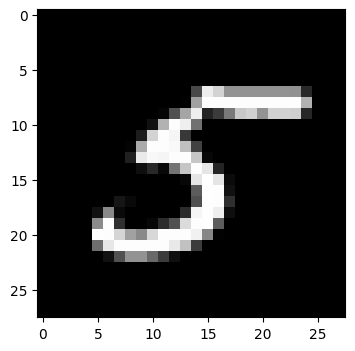

In [54]:
image= features[3].squeeze()
plt.figure(figsize=(8,4))
plt.imshow(image, cmap='gray')

In [66]:
class CNNClassifier(nn.Module):
  def __init__(self):
    super(). __init__()

    self.network= nn.Sequential(

        nn.Conv2d(1, 32, kernel_size=3, padding= 1),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Flatten(),
        nn.Linear(64 * 7 * 7, 128),
        nn.ReLU(),
        nn.Linear(128, 10)


    )
  def forward(self,x):

    return self.network(x)


In [67]:
model=CNNClassifier()
model

CNNClassifier(
  (network): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=3136, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [68]:
loss_fn=nn.CrossEntropyLoss()
lr=0.001
optimizer= torch.optim.Adam(model.parameters(),lr=lr)
epochs=10

In [69]:
for epoch in range(epochs):
  for images, labels in train_dataloader:
    # forward pass
    running_loss=0.0
    pred= model(images)
    optimizer.zero_grad()

    loss=loss_fn(pred,labels)
    running_loss+=loss.item()

    # backward pass
    loss.backward()
    optimizer.step()  # updates parameters(weights)
  print(f"Epoch ({epoch+1}/{epoch})  Loss : {loss.item():.2f}")

Epoch (1/0)  Loss : 0.01
Epoch (2/1)  Loss : 0.10
Epoch (3/2)  Loss : 0.01
Epoch (4/3)  Loss : 0.01
Epoch (5/4)  Loss : 0.05
Epoch (6/5)  Loss : 0.04
Epoch (7/6)  Loss : 0.00
Epoch (8/7)  Loss : 0.26
Epoch (9/8)  Loss : 0.01
Epoch (10/9)  Loss : 0.00


In [70]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"total : {total}, predict_correct: {correct}")
print(f'Accuracy: {100 * correct / total:.2f}%')


total : 10000, predict_correct: 9915
Accuracy: 99.15%


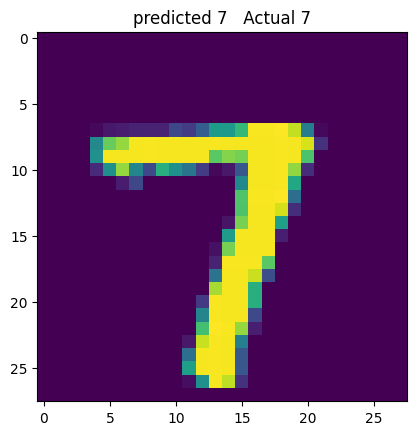

In [71]:
with torch.no_grad():
  for images, labels in test_dataloader:
    output= model(images)
    predicted = torch.argmax(output, dim=1)

plt.imshow(images[0].squeeze())
plt.title(f"predicted {predicted[0].item()}   Actual {labels[0].item()}")
plt.show()

In [72]:
import numpy as np
import cv2
from PIL import Image
import torchvision.transforms as transforms


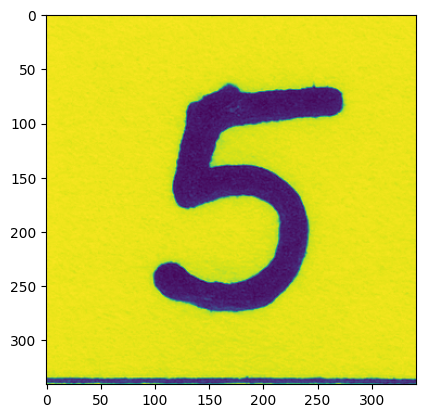

In [85]:
#image_path='/content/digit_6.png'
image_path= '/content/digit_1.png'
image= cv2.imread(image_path,  cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

In [86]:

img_pil = Image.fromarray(image)
img_tensor = transform(img_pil)

In [87]:

print(type(img_tensor))
print(img_tensor.shape)

<class 'torch.Tensor'>
torch.Size([1, 28, 28])


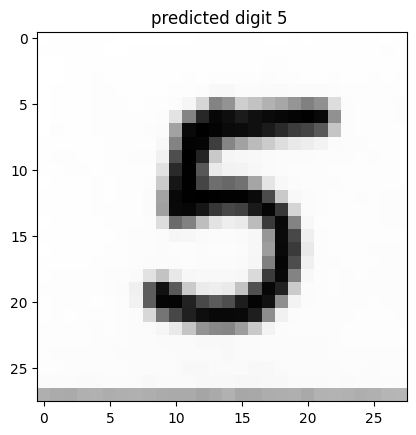

In [88]:

with torch.no_grad():

      output = model(img_tensor.unsqueeze(0))
      predicted = torch.argmax(output, dim=1)
# Visualize
plt.imshow(img_tensor.squeeze(), cmap='gray')
plt.title(f"predicted digit {predicted.item()} ")
plt.show()